y=(-0.222 ± 0.007)*x +(5.819 ± 0.038)


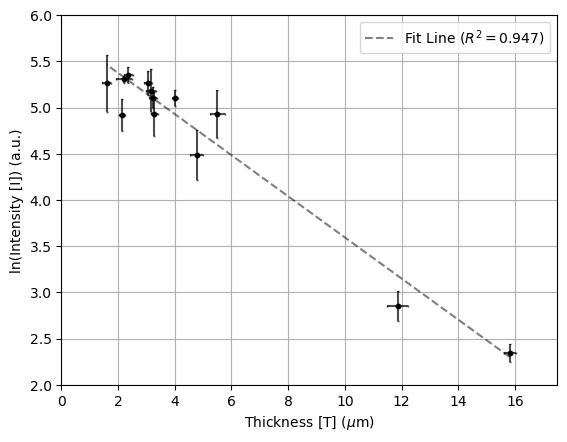

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Data
thickness = [15.815, 11.86, 5.495, 4.7755, 4.011, 3.2775, 3.2345, 3.163, 3.0475, 2.364, 2.203, 2.135, 1.598]
intensity = np.log([10.433, 17.3394, 137.8002, 88.4086, 164.2046, 138.3324, 165.199, 177.7451, 193.0965, 210.92, 201.7884, 136.9269, 193.0311])
error = [0.210950231, 0.367638266, 0.261020265, 0.233248794, 0.096349146, 0.133844961, 0.132525072, 0.187170061, 0.131824245, 0.152191016, 0.288683035, 0.115508031, 0.155955459]
yerror1=[0.0671,0.0928,0.1518,0.1705,0.0505,0.133,0.0807,0.1497,0.0722,0.057,0.0342,0.1329,0.2197]
yerror=[0.095,0.1591,0.2608,0.2699,0.0849,0.2418,0.1165,0.2337,0.1287 ,0.0868,0.0373,0.1767,0.309]

# Define the linear function
def linear_func(x, a, b):
    return a * x + b

# Fit the data
popt, pcov = curve_fit(linear_func, thickness, intensity, sigma=yerror, absolute_sigma=True)

# Extract fit parameters and their standard errors
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))

# Calculate R^2 value
y_fit = linear_func(np.array(thickness), a, b)
ss_res = np.sum((intensity - y_fit) ** 2)
ss_tot = np.sum((intensity - np.mean(intensity)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Create a plot with error bars 
plt.errorbar(thickness, intensity, xerr=error, yerr=yerror, fmt='o',color='black', ecolor='black', capsize=1, markersize=0,alpha=.7)
plt.scatter(thickness, intensity, color='black', edgecolor='black', zorder=2,s=10)

# Plot the fit line
plt.plot(thickness, y_fit, label=r'Fit Line ($R^2 = {:.3f}$)'.format(r_squared), color='black',ls='--',alpha=.5)
plt.xlabel(r'Thickness [T] ($\mu$m)')
plt.ylabel('ln(Intensity [I]) (a.u.)')
plt.ylim(2,6)
plt.xlim(0,17.5)
plt.grid()

plt.legend()
plt.savefig('/Users/leifgislason/Downloads/ThicknessvsIntensity.png',dpi=600)
# Print fit parameters with errors
print('y=' f'({a:.3f} ± {a_err:.3f})*x +({b:.3f} ± {b_err:.3f})')

plt.show()

